In [ ]:
#import modulos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#Carga de datos
# fuente: https://www.kaggle.com/uciml/pima-indians-diabetes-database
# otro: https://archive.ics.uci.edu/ml/index.php

diabetes = pd.read_csv('diabetes.csv')
print(diabetes.shape)
diabetes.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

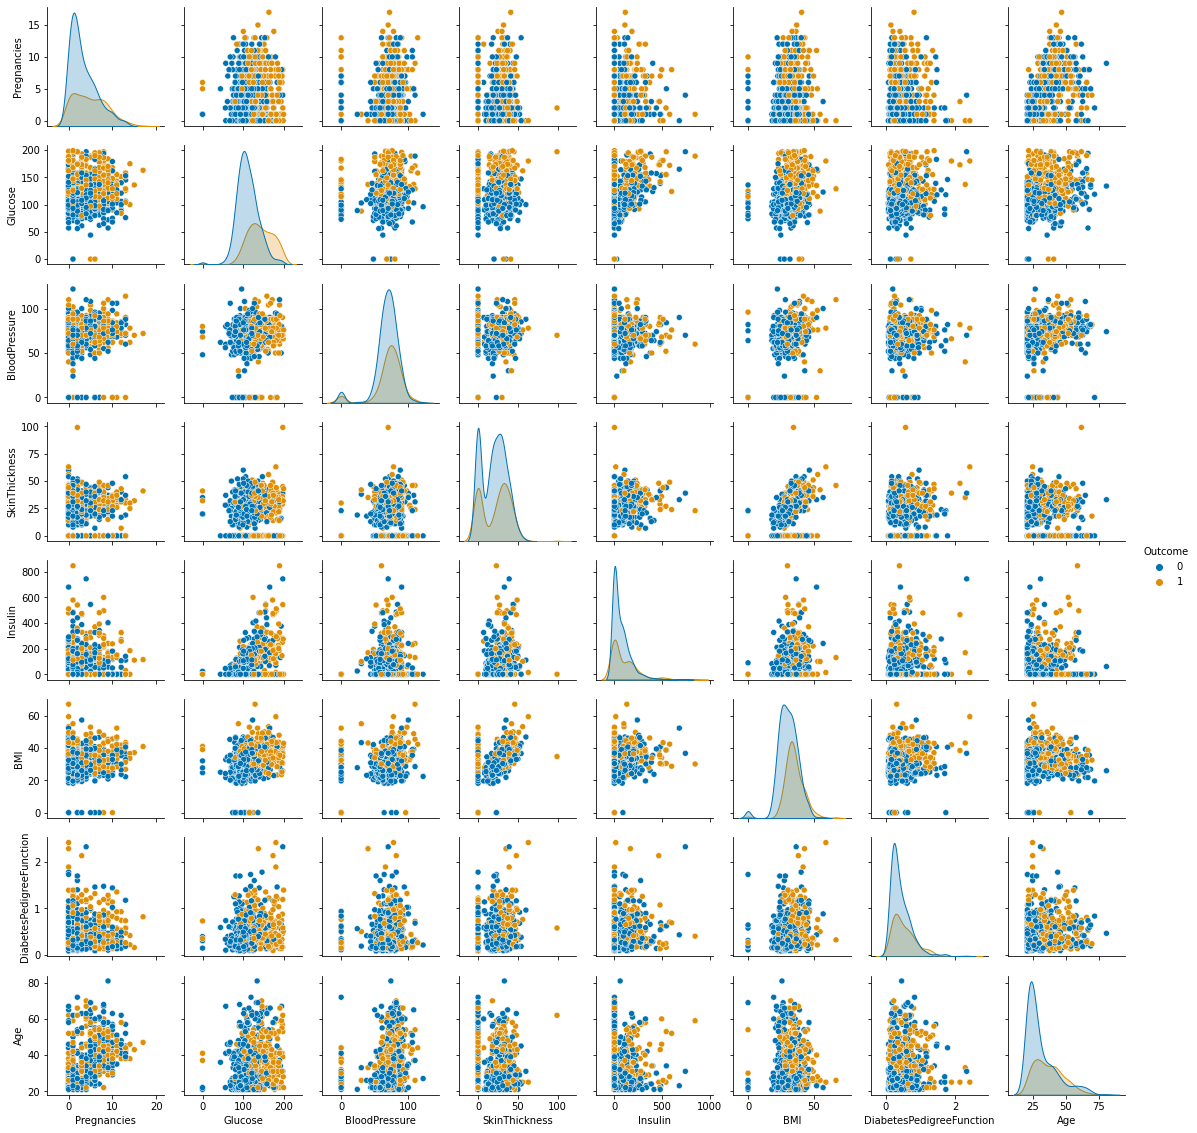

In [ ]:
import seaborn as sns
sns.pairplot(diabetes, hue='Outcome', height=2, palette='colorblind');


In [ ]:
#Separar los conjuntos de datos
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome'].values
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [ ]:
#Preparar los conjuntos de datos para entrenamiento y para testeo
from sklearn.model_selection import train_test_split

X_e, X_t, y_e, y_t = train_test_split(X,y, test_size = 0.30, random_state = 40)

print(X_e.shape);print(y_e.shape)
print(X_t.shape);print(y_t.shape)

(537, 8)
(537,)
(231, 8)
(231,)


**Crear modelo con Scikit Learn**

In [ ]:
#definir modelo
from sklearn.neural_network import MLPClassifier

modelo_skl = MLPClassifier(hidden_layer_sizes = (8, 8, 8), activation = 'relu', solver='adam', max_iter = 1000)
modelo_skl

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#entrenamiento
modelo_skl.fit(X_e,y_e)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(8, 8, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#evaluacion
from sklearn.metrics import classification_report, confusion_matrix

valores_entrenamiento = modelo_skl.predict(X_e)
valores_testeo = modelo_skl.predict(X_t)

print(confusion_matrix(y_e,valores_entrenamiento))
print(classification_report(y_e, valores_entrenamiento))

[[318  40]
 [ 95  84]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       358
           1       0.68      0.47      0.55       179

    accuracy                           0.75       537
   macro avg       0.72      0.68      0.69       537
weighted avg       0.74      0.75      0.73       537



In [ ]:
print(confusion_matrix(y_t,valores_testeo))
print(classification_report(y_t, valores_testeo))

[[122  20]
 [ 55  34]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.76       142
           1       0.63      0.38      0.48        89

    accuracy                           0.68       231
   macro avg       0.66      0.62      0.62       231
weighted avg       0.67      0.68      0.65       231



**Crear Modelo con Pytorch**

In [ ]:
# Importar pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

X_e_t = torch.FloatTensor(X_e)
X_t_t = torch.FloatTensor(X_t)

y_e_t = torch.LongTensor(y_e)
y_t_t = torch.LongTensor(y_t)

In [ ]:
class Modelo_NN(nn.Module):
  def __init__(self, input_features = 8, hidden1 = 8, hidden2 = 8, out_features = 2):
    super().__init__()
    self.f_conencted1 = nn.Linear(input_features, hidden1)
    self.f_conencted2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)
  
  def forward(self, x):
    x = F.relu(self.f_conencted1(x))
    x = F.relu(self.f_conencted2(x))
    x = self.out(x)
    return x

In [ ]:
#Instanciar el modelo
torch.manual_seed(20)
modelo_torch = Modelo_NN()
modelo_torch.parameters
modelo_torch.parameters()

<generator object Module.parameters at 0x7f74f06a0258>

In [ ]:
#entrenamiento
costo = nn.CrossEntropyLoss()
optimizador = torch.optim.Adam(modelo_torch.parameters(), lr = 0.01)
epochs = 1000
costos_totales = []

for i in range(epochs):
  i += 1
  y_p = modelo_torch.forward(X_e_t)
  c = costo(y_p, y_e_t)
  costos_totales.append(c)

  if i%10 ==1:
    print('Generacion: {} con costo: {}'.format(i,c.item()))

  optimizador.zero_grad()
  c.backward()
  optimizador.step()

Generacion: 1 con costo: 3.583815336227417
Generacion: 11 con costo: 1.0876487493515015
Generacion: 21 con costo: 0.7207788228988647
Generacion: 31 con costo: 0.6558699011802673
Generacion: 41 con costo: 0.6305144429206848
Generacion: 51 con costo: 0.6059116125106812
Generacion: 61 con costo: 0.5898311138153076
Generacion: 71 con costo: 0.5784378051757812
Generacion: 81 con costo: 0.5689406394958496
Generacion: 91 con costo: 0.5606082677841187
Generacion: 101 con costo: 0.5544196367263794
Generacion: 111 con costo: 0.5500707030296326
Generacion: 121 con costo: 0.5467376708984375
Generacion: 131 con costo: 0.5437192916870117
Generacion: 141 con costo: 0.5409335494041443
Generacion: 151 con costo: 0.5363562703132629
Generacion: 161 con costo: 0.5293863415718079
Generacion: 171 con costo: 0.5235975980758667
Generacion: 181 con costo: 0.5184544324874878
Generacion: 191 con costo: 0.5143747925758362
Generacion: 201 con costo: 0.5106803178787231
Generacion: 211 con costo: 0.5067397952079773


Text(0.5, 0, 'Generaciones')

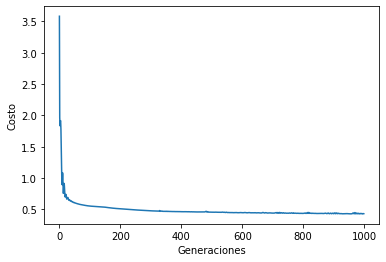

In [ ]:
plt.plot(range(epochs), costos_totales)
plt.ylabel('Costo')
plt.xlabel('Generaciones')

In [ ]:
#predecir

predicciones = []

with torch.no_grad():
  for i, data in enumerate(X_t_t):
    y_p = modelo_torch(data)
    predicciones.append(y_p.argmax().item())
predicciones

[1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0]

In [ ]:
print(confusion_matrix(y_t_t, predicciones))

print(classification_report(y_t_t, predicciones))

[[121  21]
 [ 37  52]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       142
           1       0.71      0.58      0.64        89

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.75      0.75      0.74       231



**Crear un Modelo con Keras**

In [ ]:
#importar Keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#creacion del modelo
modelo_keras = Sequential()
modelo_keras.add(Dense(8, input_dim= 8, activation= 'relu'))
modelo_keras.add(Dense(8, activation= 'relu'))
modelo_keras.add(Dense(8, activation= 'relu'))
modelo_keras.add(Dense(1, activation= 'sigmoid'))

modelo_keras.compile(loss="binary_crossentropy", optimizer= "adam", metrics= ['accuracy'])

In [ ]:
#entrenamiento
historial = modelo_keras.fit(X_e, y_e, epochs=1000, batch_size=10, validation_data=(X_t, y_t))

Epoch 1/1000
54/54 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8305 - val_loss: 0.5973 - val_accuracy: 0.7532
Epoch 2/1000
54/54 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.8454 - val_loss: 0.6109 - val_accuracy: 0.7359
Epoch 3/1000
54/54 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8305 - val_loss: 0.6058 - val_accuracy: 0.7532
Epoch 4/1000
54/54 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8138 - val_loss: 0.5455 - val_accuracy: 0.7576
Epoch 5/1000
54/54 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8324 - val_loss: 0.6063 - val_accuracy: 0.7619
Epoch 6/1000
54/54 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8231 - val_loss: 0.5700 - val_accuracy: 0.7532
Epoch 7/1000
54/54 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8194 - val_loss: 0.6117 - val_accuracy: 0.7619
Epoch 

In [ ]:
#evaluar
evaluacion = modelo_keras.evaluate(X_t, y_t)
print("n%s: %.2f%%" % (modelo_keras.metrics_names[1], evaluacion[1]*100))

8/8 [==============================] - 0s 1ms/step - loss: 0.6957 - accuracy: 0.7532
naccuracy: 75.32%


In [ ]:
predicciones = modelo_keras.predict(X_t)
predicciones = np.argmax(predicciones, axis=1)

print(confusion_matrix(y_t, predicciones))
print(classification_report(y_t, predicciones))

[[142   0]
 [ 89   0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       142
           1       0.00      0.00      0.00        89

    accuracy                           0.61       231
   macro avg       0.31      0.50      0.38       231
weighted avg       0.38      0.61      0.47       231



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


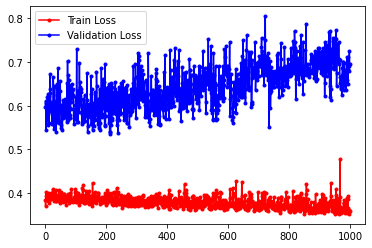

In [ ]:
fig, ax = plt.subplots()
ax.plot(historial.history["loss"], 'r', marker= '.', label= "Train Loss")
ax.plot(historial.history["val_loss"], 'b', marker= '.', label= "Validation Loss")
ax.legend();